<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_mar_2020/blob/master/Imagem_Segmentacao_v_04_maio_08_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import zipfile

In [2]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
!pip install mahotas
import Go2BlackWhite
import Go2Mahotas
import mahotas.features.texture as mht
import mahotas.features

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [3]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
#!ls

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [0]:
Transfere='Fotos_Grandes.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [0]:
Size=500 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)

In [0]:
#print(ww[0])

In [0]:
#img = data.astronaut()
#print(img)
img=ww[0]
img = rgb2gray(img)

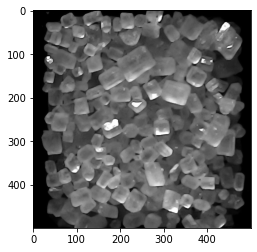

In [9]:
plt.imshow(img, cmap = "gray")

In [10]:
print(img)

[[1 1 0 ... 0 0 0]
 [3 1 0 ... 0 0 0]
 [4 1 0 ... 0 0 0]
 ...
 [5 3 1 ... 0 0 0]
 [6 3 1 ... 0 0 0]
 [6 3 1 ... 0 0 0]]


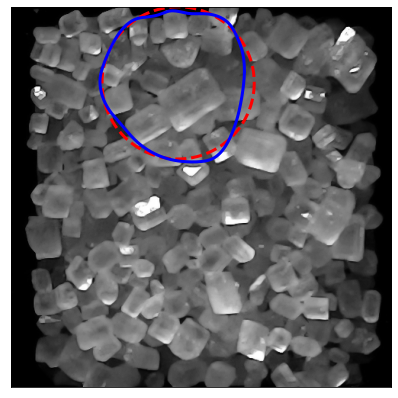

In [11]:

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001,
                       coordinates='rc')

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

In [0]:
def find_squares(img):
    img = cv2.GaussianBlur(img, (5, 5), 0)
    squares = []
    for gray in cv2.split(img):
        for thrs in range(0, 255, 26):
            if thrs == 0:
                bin = cv2.Canny(gray, 0, 50, apertureSize=5)
                bin = cv2.dilate(bin, None)
            else:
                _retval, bin = cv2.threshold(gray, thrs, 255, cv2.THRESH_BINARY)
            bin, contours, _hierarchy = cv2.findContours(bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
            for cnt in contours:
                cnt_len = cv2.arcLength(cnt, True)
                cnt = cv2.approxPolyDP(cnt, 0.02*cnt_len, True)
                if len(cnt) == 4 and cv2.contourArea(cnt) > 1000 and cv2.isContourConvex(cnt):
                    cnt = cnt.reshape(-1, 2)
                    max_cos = np.max([angle_cos( cnt[i], cnt[(i+1) % 4], cnt[(i+2) % 4] ) for i in range(4)])
                    #print(cnt)
                    a = (cnt[1][1] - cnt[0][1])

                    if max_cos < 0.1 and a < img.shape[0]*0.8:

                        squares.append(cnt)
    return squares


In [13]:
dice=img
squares = find_squares(dice)
cv2.drawContours(dice, squares, -1, (0, 255, 0), 3)

ValueError: ignored